In [1]:
import os
import tarfile
import urllib

### fetch data

In [2]:
download_root = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
housing_path = os.path.join('datasets','housing')
housing_url = download_root + 'datasets/housing/housing.tgz'

In [3]:
def fetch_housing_data(housing_url=housing_url,housing_path=housing_path):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

> exist_ok (optional) : A default value False is used for this parameter. If the target directory already exists an OSError is raised if its value is False otherwise not. For value True leaves directory unaltered. 

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=housing_path):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
len(housing)

20640

quick description of the data

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> we have 20640 instance but only 20433 for **total_bedrooms** mean (207 are missing) we must take care of this

In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# Summary of the numerical attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


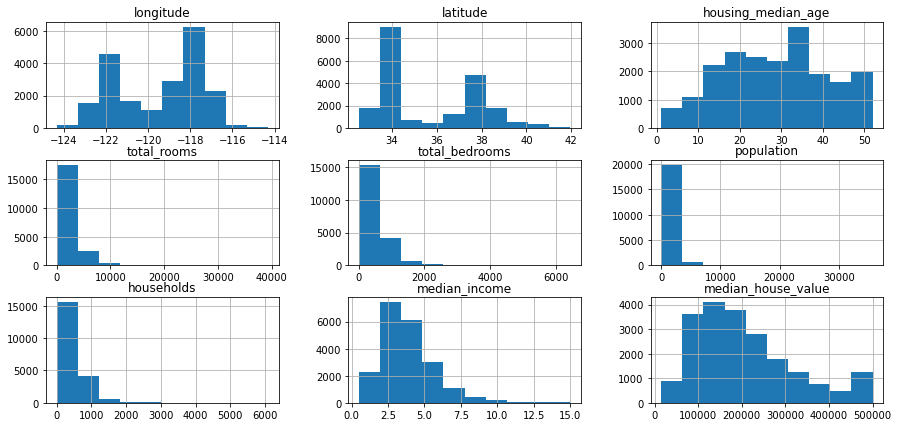

In [11]:
import matplotlib.pyplot as plt

housing.hist(bins=10, figsize=(15,7))
plt.show()

> hist() show the whole datasets i histrogram

> bin = number of towers or if using [100,120,130] it's have 3 towers seperate 100,120,130

### Create a data set

In [12]:
import numpy as np

def data_spilting(data,test_ratio,random_seed):
    np.random.seed(random_seed) # for reproducibility
    shuffle = np.random.permutation(len(data)) #random rows
    test_size = int(len(data) * test_ratio)
    test_indices = shuffle[:test_size] #get first index from random rows to test_size
    train_indices = shuffle[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices] #get data by random index


In [13]:
# random number in range and shuffle
np.random.permutation(7) 

array([6, 3, 5, 2, 0, 4, 1])

In [14]:
train_set, test_set = data_spilting(housing,test_ratio=0.2,random_seed=42)
print(len(train_set),len(test_set))
train_set.head()

16512 4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=.2 , random_state=42)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [16]:
housing['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

> Use **cut** when you need to segment and sort data values into bins.

> np.inf : infinity // seperate if value morethan 6 -> infinity mean 5th segment

<AxesSubplot:>

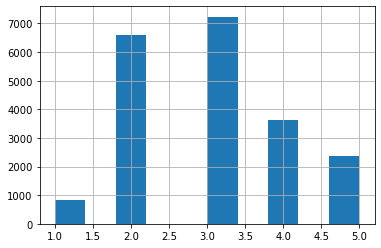

In [17]:
housing['income_cat'] = pd.cut(housing['median_income'],
                                bins=[0.,1.5,3.0,4.5,6.,np.inf],
                                labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [18]:
housing['median_income'].head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

In [19]:
housing['income_cat'].head()

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit 

split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

> .spilt: Generate indices to split data into training and test set.

In [21]:
start_test_set['income_cat'].value_counts() / len(start_test_set) # / len(start_test_set) -> to percent

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Remove income_cat attribute back to original state

In [22]:
for set_ in (start_train_set, start_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [23]:
start_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

> s is stand for size

> c is color

> get_cmap is just color range :[more color for using]( https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html)

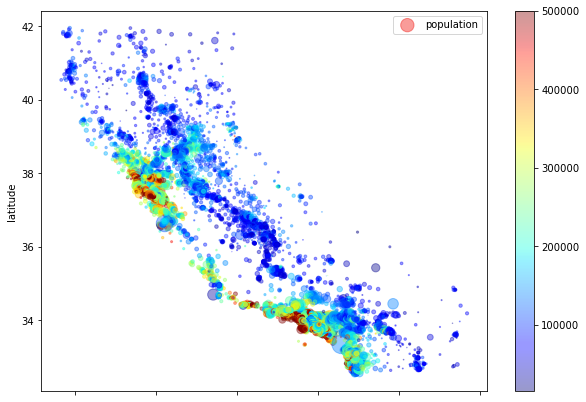

In [24]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=.4,
            s=housing['population']/100, label='population',figsize=(10,7),
            c=housing['median_house_value'],cmap=plt.get_cmap('jet'),colorbar=True);

### Looking for Correlation

Data correlation is the way in which one set of data may correspond to another set. val between -1 to 1

for example: if close to 1 it mean strong positive correlarion if ones go high the other will goes up.

the correlation measure only linear form: mean it may miss out on nonlinear relationships

In [25]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


> ascending = False : mean from High to low value

In [26]:
corr_matrix['median_house_value'].sort_index(ascending=False)

total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
median_income         0.688075
median_house_value    1.000000
longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
households            0.065843
Name: median_house_value, dtype: float64

> if *median_house_value* go up: total room will slightly goes up and latitute will slightly goes down

Another way to check for correlation is **scatter_matrix** 
* plots every numerical attribute : we have 11 column of numeric will plot 121 plot **but we will show some plot example**

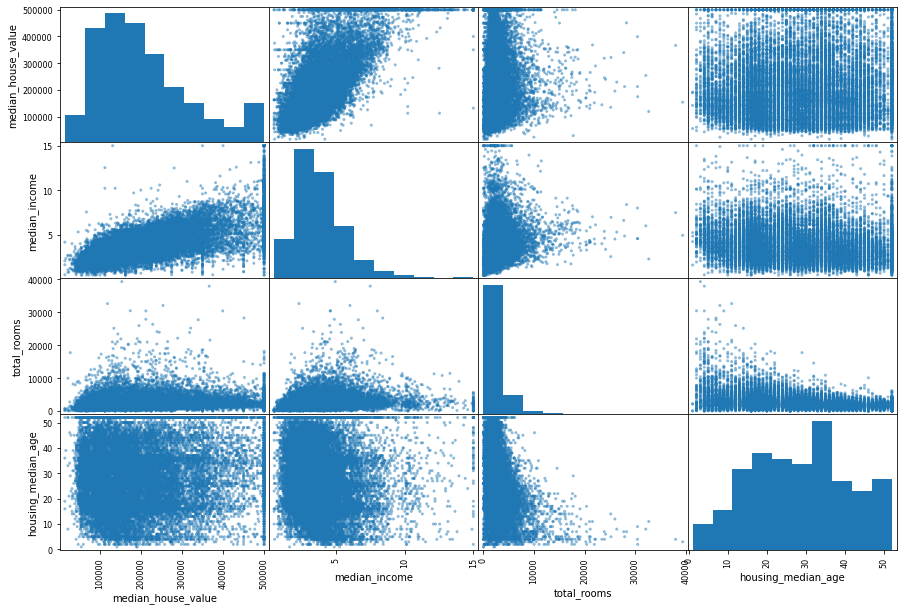

In [27]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(15,10));

> the most *promising attribute* to predict the **median_house_value** is median income, so let's zoom it in

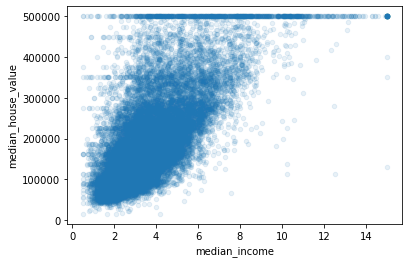

In [28]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.1);

Try out various attribute combinations: make data interesting and reasonable.

In [29]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [30]:
housing['room_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467


In [32]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
room_per_household          0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### Prepare the data for Machine Learning

* create feateures and labels
* data cleaning

In [33]:
housing = start_train_set.drop('median_house_value', axis=1)
housing_labels = start_train_set['median_house_value'].copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


> in data cleaning we have 3 option
* dropna : get rid of NAN value
* drop : get rid of whole attribute
* filllna : set some value for NAN

In [34]:
# let's check if has null value 
has_nul = []
for attribute in housing.columns :
    if housing[attribute].isnull().values.any() :
        has_nul.append(attribute)
has_nul

['total_bedrooms']

In [35]:
# fillna with median
total_bedrooms_median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(total_bedrooms_median, inplace=True)

Scikit-learn provide a handy class to take care missing values: **SimpleImputer**

In [36]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


we see **ocean_proximity** is not number so we don't cimputed that

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

Transform to nparray

In [38]:
X = imputer.transform(housing_num)
X.shape

(16512, 8)

if you want to put back to pandas :

In [39]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr.sample(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4859,-118.30,34.02,34.0,3184.0,772.0,2474.0,705.0,1.6310
10780,-117.91,33.64,37.0,1998.0,472.0,1030.0,436.0,3.9306
16568,-121.42,37.71,7.0,8297.0,1433.0,4189.0,1271.0,4.3696
16936,-122.32,37.56,49.0,2016.0,299.0,691.0,288.0,5.5490


> or you can use fit_transform for faster

### Handling text and Categorical attributes
* convert from text to number **ScikitLearn's OrdinalEncoder**

In [40]:
housing_cat = housing[['ocean_proximity']] # [[]] for create looks good Dataframe
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:6], housing_cat[:6]

(array([[1.],
        [4.],
        [1.],
        [4.],
        [0.],
        [3.]]),
       ocean_proximity
 12655          INLAND
 15502      NEAR OCEAN
 2908           INLAND
 14053      NEAR OCEAN
 20496       <1H OCEAN
 1481         NEAR BAY)

In [42]:
# youcan get the list categiries
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> but **ocean_proximity** is not in case 'bad' , 'average', 'good' then we can not number to them

> to fix this we use **OneHotEncoder**

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
housing_cat_1hot.toarray()[:6], housing_cat_encoded[:6]

(array([[0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.]]),
 array([[1.],
        [4.],
        [1.],
        [4.],
        [0.],
        [3.]]))

In [45]:
# same as ordinal encoder
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Transformation Pipelines

make it easy and clearly

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 8)

so far, we have handled the categorical columns and numerical columns separately. but we can use **ColumnTransformer** for handled both instantly.

In [47]:
from sklearn.compose import ColumnTransformer

num_arrtribs = list(housing_num.columns)
cat_arrtribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_arrtribs),
    ('cat', OneHotEncoder(), cat_arrtribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared[0]

array([-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
        0.73260236,  0.55628602, -0.8936472 ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

### Select and Train Model

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [49]:
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [50]:
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared[0]

array([-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
        0.73260236,  0.55628602, -0.8936472 ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

In [51]:
print(f'Predictions: {lin_reg.predict(some_data_prepared).round(2)}')
print(f'True Labels: {list(some_labels)}')

Predictions: [ 88983.15 305351.35 153334.71 184302.55 246840.19]
True Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


> it's work but not exactly accurate

let's measure by **mean_squared_error()**

In [52]:
from sklearn.metrics import mean_squared_error

hosing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, hosing_predictions)
np.sqrt(lin_mse) # standard diviation

69050.56219504567

> the model *LinearRegression* is not good for this problem, let's try more complex model 

Let's train a **DecisionTreeRegressor** capable of finding complex nonlinear relationships in the data.

In [53]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [54]:
hosing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,hosing_predictions)
np.sqrt(tree_mse)

0.0

> !what, No error at all? badly it *overfit* the data , as we saw earlier, you don't want to touch the test set until the model is ready, so you need to traning set for train, and another for validation

* use *train_test_spilt()*
* or *cross_validation*, it randomly spilt the training set into 10 distinct subset called *folds*, then it's train 10 times, by picking a different fold for evaluation every time and training on 9 folds.

In [55]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
# negative mse, 10 loob, 
tree_rmse_scores = np.sqrt(-score).round(4)
tree_rmse_scores # RMSE for each times

array([70437.5573, 70106.3703, 65081.6911, 69763.5686, 68739.6183,
       67904.5096, 72632.6012, 69583.8736, 68146.0047, 72625.0413])

In [56]:
-score.mean(), score.std()

(4835077699.663652, 294713485.20403486)

> *the DecisionTree* doesn't look as good as it did earlier.

let's compute score for the LinearRegression

In [57]:
lin_scores = cross_val_score(lin_reg, housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores).round(4)
lin_rmse_scores

array([72229.0347, 65318.224 , 67706.396 , 69368.5374, 66767.6106,
       73003.7527, 70522.2441, 69440.779 , 66930.3295, 70756.3195])

In [58]:
-lin_scores.mean(), lin_scores.std()

(4794865007.808744, 328369880.5761285)

> it's seem like *LinearRegression* is performed better.

Let's try the **RandomForestRegressor** , randomforest work by training many Decision Trees on random subsets of the features

Building a model on top of many other models is called *Ensemble Learning* ( use multiple learning algorithms to obtain better predictive performance )

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
hosing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,hosing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18438.967600508826

> this must better RandomForest look very promising(showing signs of future success)

Save model

In [63]:
import joblib

joblib.dump(forest_reg, 'forest_reg_housing.pkl')
# model = joblib.load('forest_reg_housing.pkl')

['forest_reg_housing.pkl']

### Fine-Tune the model
using **Grid Search** ,is tell it which hyperparameters you want it to experiment.

In [64]:
from sklearn.model_selection import GridSearchCV

params_grid = [
    {'n_estimators' : [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10],'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, params_grid, cv=5,
                scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [69]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) :
    print(np.sqrt(-mean_score).round(3), params)

64648.369 {'max_features': 2, 'n_estimators': 3}
55136.425 {'max_features': 2, 'n_estimators': 10}
52402.845 {'max_features': 2, 'n_estimators': 30}
60676.375 {'max_features': 4, 'n_estimators': 3}
53078.011 {'max_features': 4, 'n_estimators': 10}
50459.126 {'max_features': 4, 'n_estimators': 30}
59916.434 {'max_features': 6, 'n_estimators': 3}
52442.757 {'max_features': 6, 'n_estimators': 10}
50208.377 {'max_features': 6, 'n_estimators': 30}
57993.027 {'max_features': 8, 'n_estimators': 3}
51877.887 {'max_features': 8, 'n_estimators': 10}
50027.84 {'max_features': 8, 'n_estimators': 30}
61673.952 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54773.182 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59522.448 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52212.943 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58866.645 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51512.548 {'bootstrap': False, 'max_features': 4, 'n_estim

> {'max_features': 8, 'n_estimators': 30} is the best of hyperparameter for using

> using **RandomizedSearch** if you want to try more hyperparameter without setting it , say 1,000 iterations

Analyze the Best Models and Their Errors

the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.08591784e-01, 1.01344771e-01, 4.93625356e-02, 3.02040121e-02,
       2.69123599e-02, 3.88311093e-02, 2.62431869e-02, 4.53673873e-01,
       1.10708586e-02, 1.45876352e-01, 5.64648293e-05, 2.45108177e-03,
       5.38161033e-03])

In [75]:
full_pipeline.named_transformers_['cat']

OneHotEncoder()

In [78]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [79]:
num_arrtribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [83]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_1hot_arrtribs = list(cat_encoder.categories_[0])
attributes = num_arrtribs + cat_1hot_arrtribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4536738729516843, 'median_income'),
 (0.14587635224615028, 'INLAND'),
 (0.10859178398063822, 'longitude'),
 (0.10134477149299845, 'latitude'),
 (0.04936253556520366, 'housing_median_age'),
 (0.03883110930579045, 'population'),
 (0.030204012141161352, 'total_rooms'),
 (0.0269123598884227, 'total_bedrooms'),
 (0.026243186881064515, 'households'),
 (0.011070858613474089, '<1H OCEAN'),
 (0.00538161033324394, 'NEAR OCEAN'),
 (0.002451081770844031, 'NEAR BAY'),
 (5.646482932379295e-05, 'ISLAND')]

### Evaluate on the Test set

In [85]:
final_model = grid_search.best_estimator_

x_test = start_test_set.drop('median_house_value', axis=1)
y_test = start_test_set['median_house_value'].copy()

x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
np.sqrt(final_mse) # standard diviations

47362.229189111946